# GPU resources and Google Colab

Helfull computational resources that can be used for free to accelarate training of certain neural networks. Check out this nice list of [deep learning in cloud repository](https://github.com/zszazi/Deep-learning-in-cloud) tools for online resources and most of the support GPU's but not all are free. We are going to use [google colab](https://colab.research.google.com/?utm_source=scs-index) 

It is a jupyter notebook environment. Its easy to use and view the result but when code becomes more complicate sometimes a cloud environmnet would be nice to use with python scripts. So I encourage to explore that list that i mentioned and find what is suitable for you. Ultimately it is up to you what you want to use for your education activities/projects. But google colabl is relatively beginner friendly.

It is important in colab environmet to select GPU.

<code>**1)**</code> Navigate to runtine environment

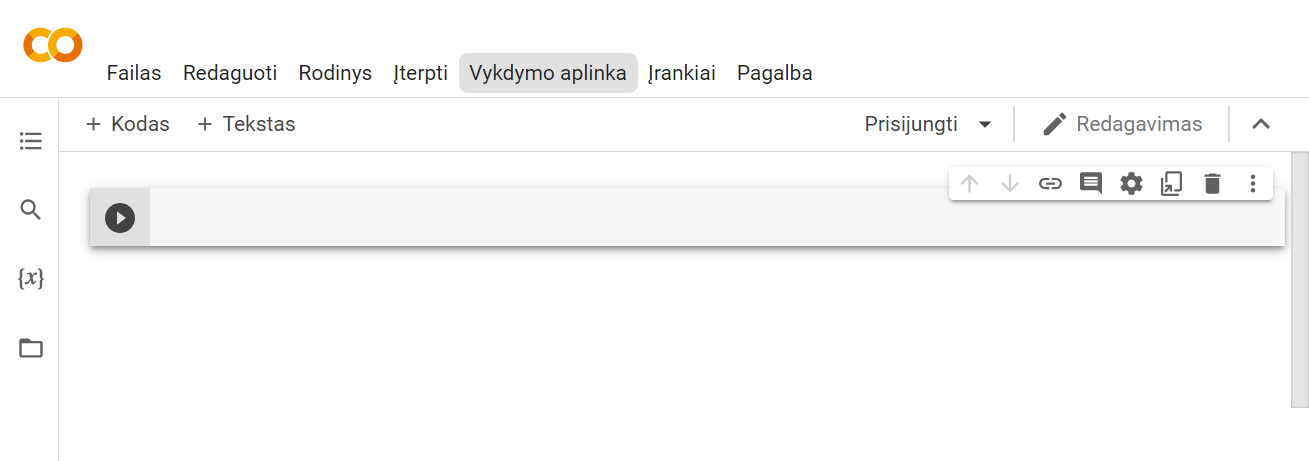

<code>**2**</code> Select GPU environment

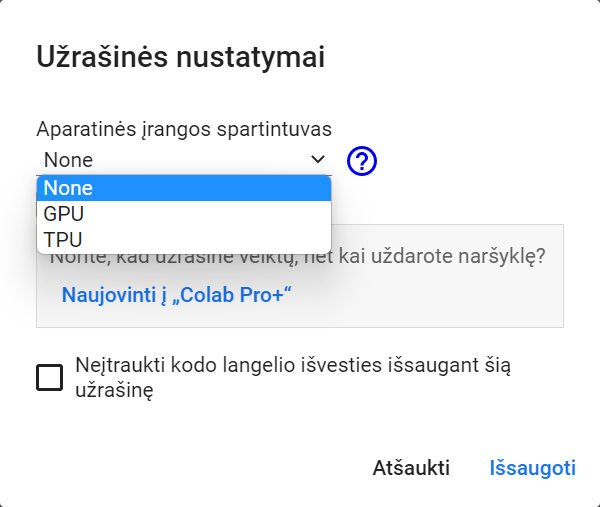

<code>**3**</code> check is PyTorch is available

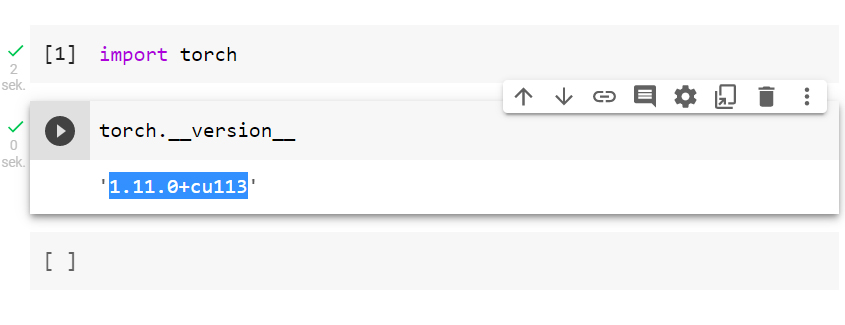

<code>**1.11.0+cu113**</code> load a 1.11 version which is the recent one. And also this <code>**cu113**</code> is google specific thing. Because usually this doesnt show up when we import torch on our computer. It means that this PyTorch version has cuda <code>**11.3**</code> support. And to make sure that indeed recognizes GPU run this command in colab notebook:

In [ ]:
torch.cuda.is_available()

We can open notebooks that are stored in our [course github repository](https://github.com/tavo-robotas/edu_deep_learning) directly in colab environment.

<code>**1**</code> Navigate to file > open notebook

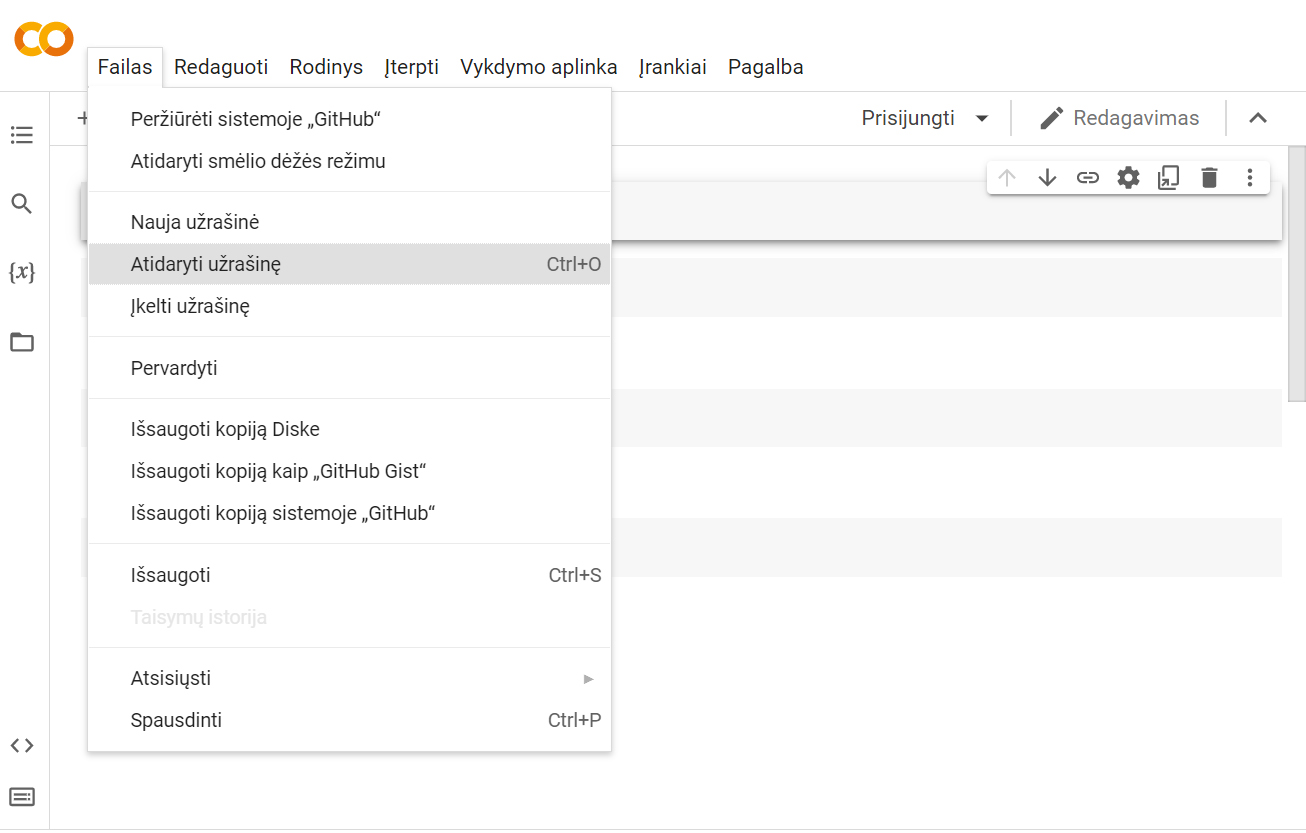

<code>**2**</code> Pick Github tab and copy paste specific .ipynb notebook file or entire repositry with notebook files and pick the one you want to load

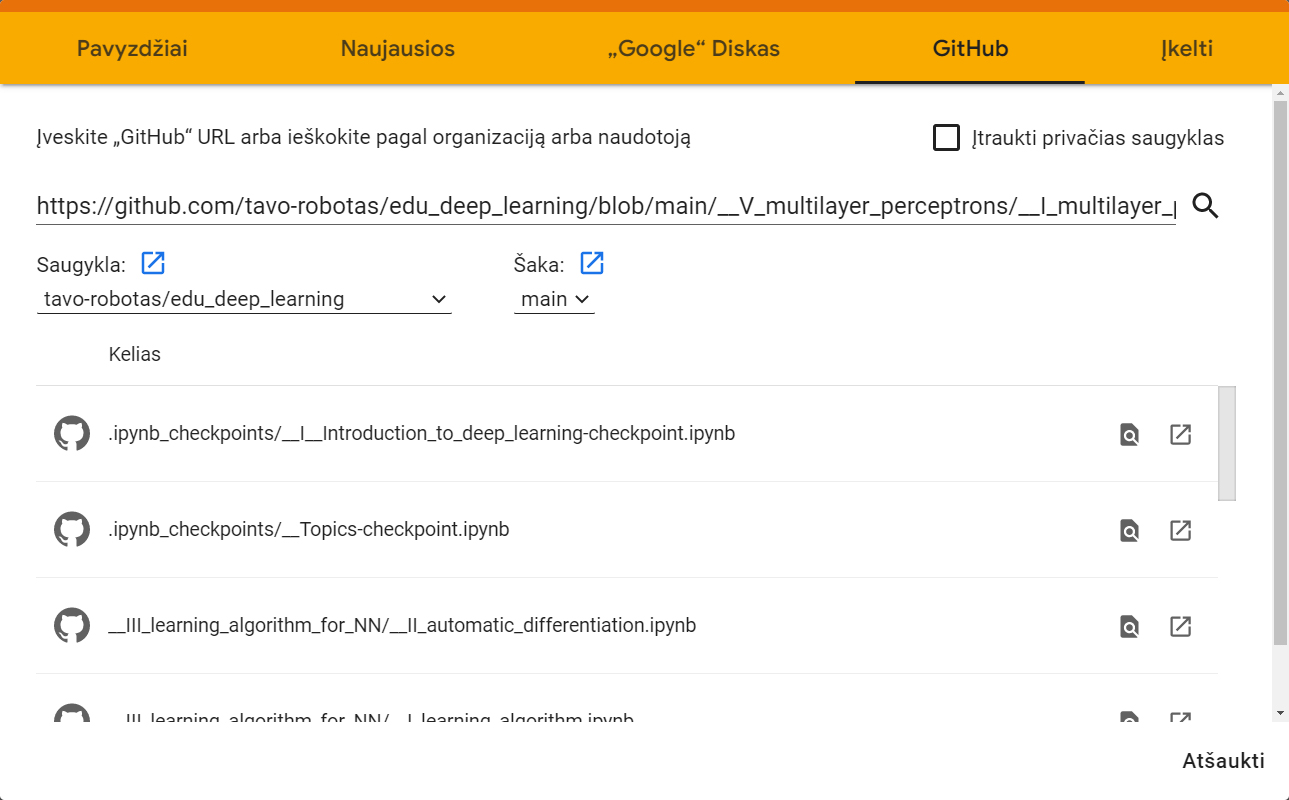

Lets one lets say <code>**__I_multilayer_perceptron_architecture**</code> from section <code>**__V_multilayer_perceptrons**</code>. By trying to execute code on this notebook you will see this warning message popup.

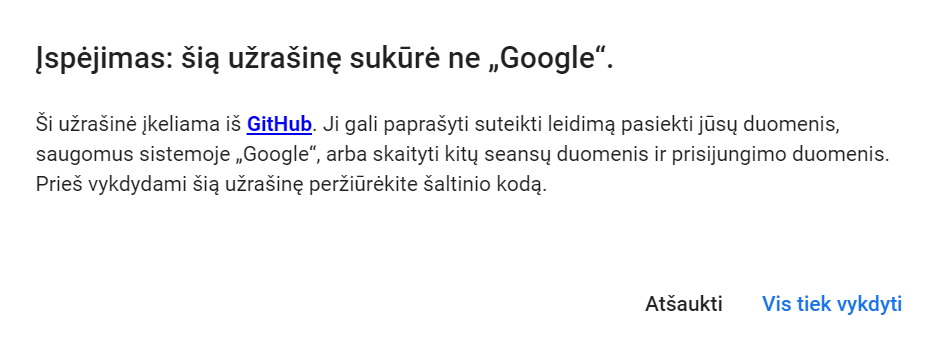

In case we would pick the <code>**__III_training_adaline.ipynb**</code> from section <code>**__III_learning_algorithm_for_NN**</code> and try to load our dataset we would get an <code>**FileNoFoundError**</code>:

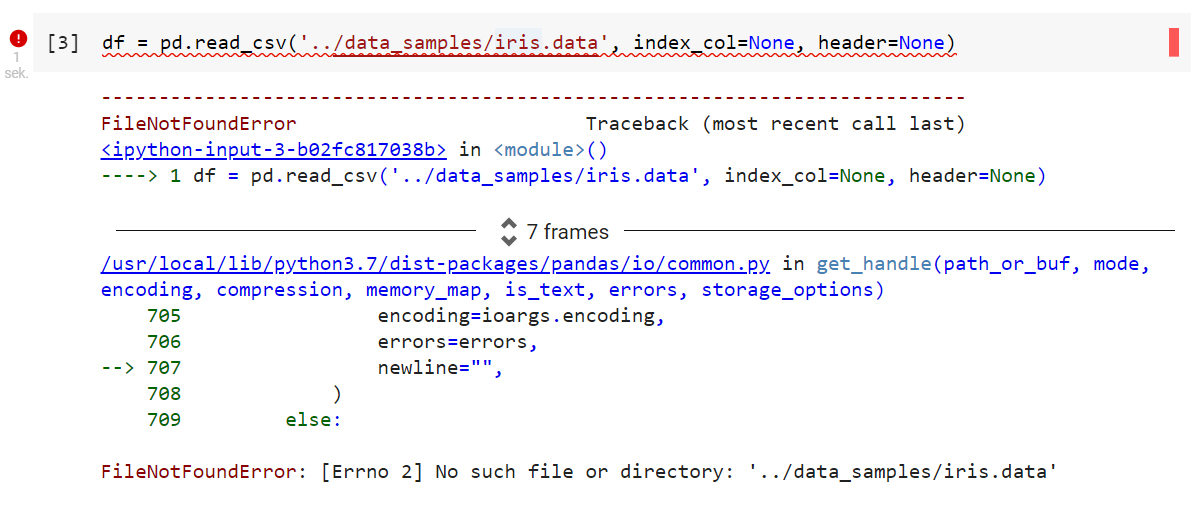

The thing is that we loaded the notebook but we did not load the data. If we would look at our course datasets root storage in subfolder `data_samples` we have our iris.data dataset which this notebook in colab doesn't know about, it doesn't know where from to load data. One way is to copy the directory link of csv and give to <code>**pd.read_csv**</code> method, it can load directly from a csv file stored in remote server. But in practice if we have a data file that is not a csv file and its on your computer. We want to have a more general soliution. For that we will have to mount our <code>**Google Drive**</code> folder. So this is a little bit complicated. So assume that this data set `iris.data` we have locally , if you don't then download it. Go into you Google Drive, you will notice that there is a <code>**Colab Notebooks**</code> folder. This is automatically generated.

<code>**1**</code> Save current opened notebook, colab environment will throw an error like this:

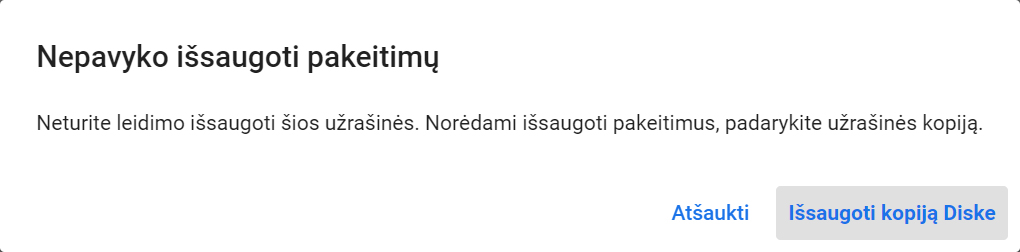

We have to make a copy because it is loaded directly from github repository and it doesn't allow us to overwrite the file in this particular repository which makes sense. Just save it in your local Google Drive disk by drag and doping from your local storage folder in computer 

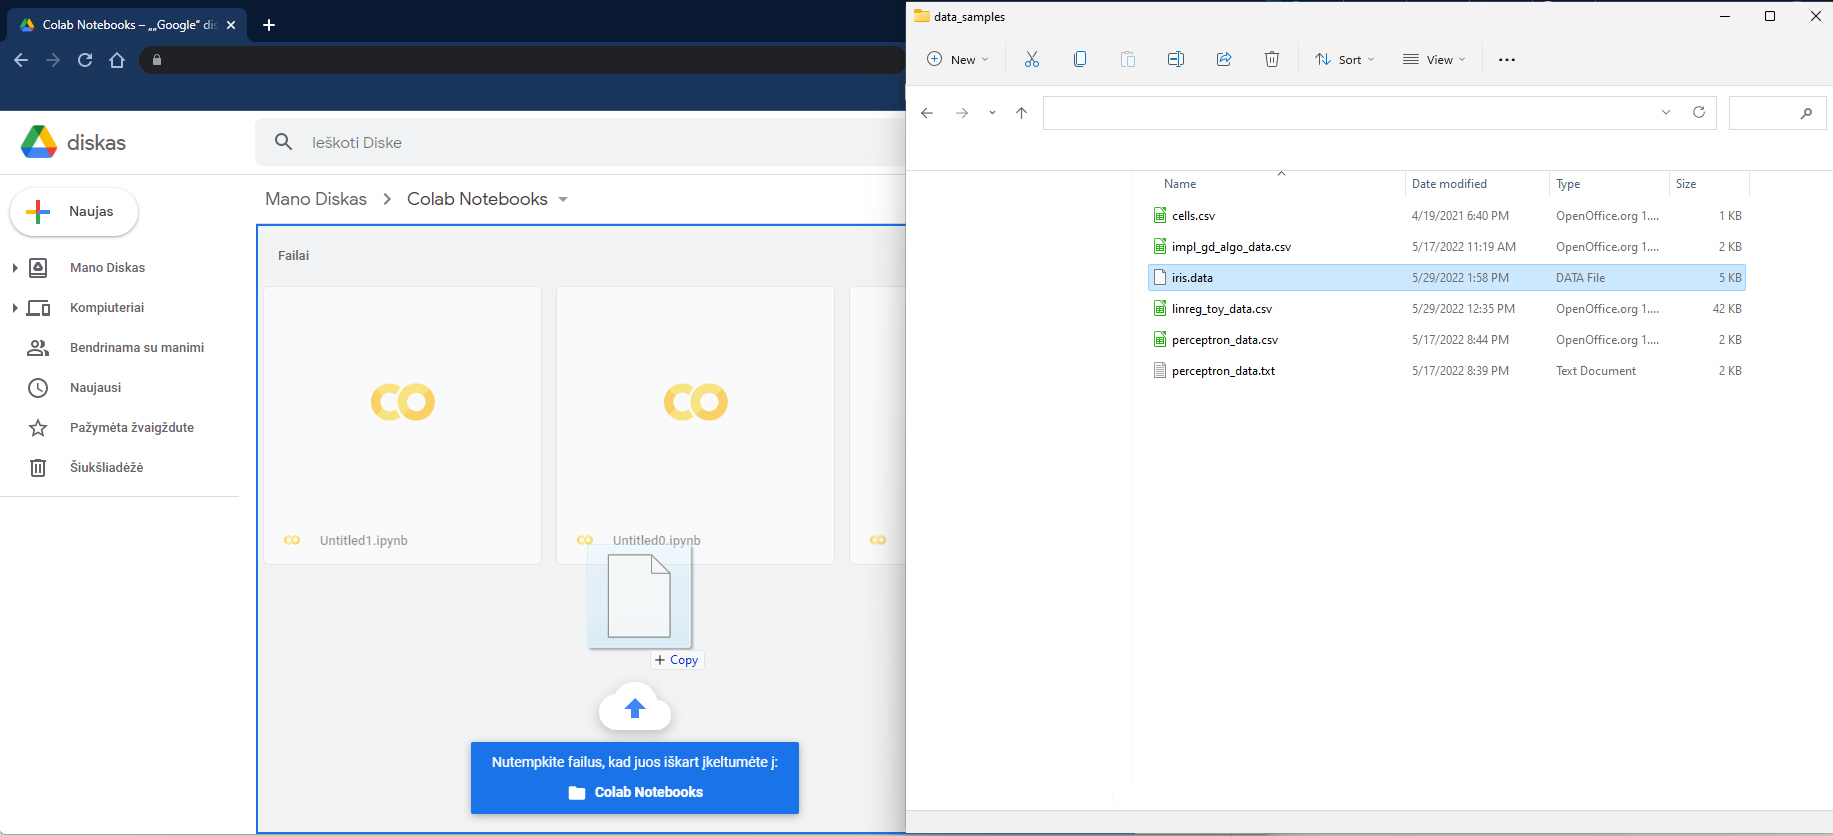

Now we have to mount our Google Drive into this notebook. Type in the notebook followig command:

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

The it will ask you to enter authorization code which we can do by following provided link and grand permission to acces your Google Drive. Next thing is that this colab notebook sits at some google server and our google drive is another place. So we have to be a bit more specific and provide a concrete adress of our dataset file. So in the pandas <code>**read_csv**</code> method as first argument of file path add the following line `/content/drive/My Drive/Colab Notebooks/iris.data` 

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris.data', index_col=None, header=None)

Now to servers or computer are involved. One is where your data sits and other where this notebook is running. And the communication between those computer can be somewhat slow because it goes over internet. To speed up things up when we work with more complicated datasets it actually better to copy this data to the same computer that is running this notebook. So do the following to copy files to the same server as colab notebook.  

<code>**1**</code> Make a folder let say with a name <code>**datasets**</code> in your <code>**Colab Notebooks**</code> folder and place the iris.data in there

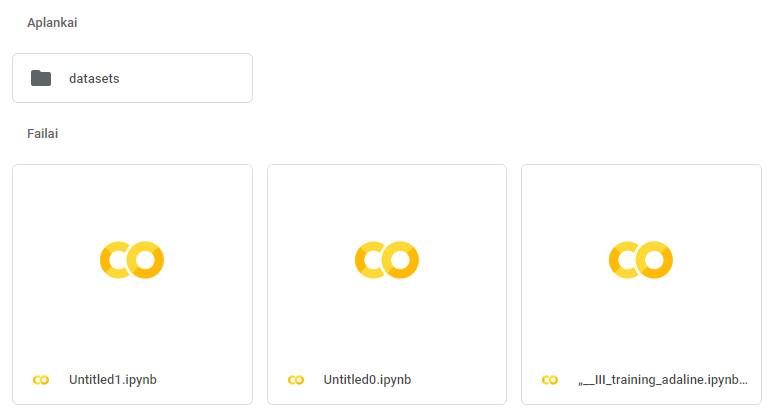

<code>**2**</code> in the colab notebook run the following commands to copy the contnet of datasets in Google Drive to Colab notebooks datasets folder:

In [ ]:
import shutil
shutil.copytree('/content/drive/My Drive/Colab Notebooks/iris.data', 'datasets')

If we have large datasets the training will be faster when we will use <code>**PyTorch dataloaders**</code> if the dataset is located locally like we did. And in case we have even more complicated datasets then i would recommend to create a <code>**.zip**</code> file and place it as well in the Colab notebooks root folder as a file like <code>**datasets.zip**</code> and then modify <code>**shutil utility function**</code>  as following:

In [ ]:
shutil.copy('/content/drive/My Drive/Colab Notebooks/datasets.zip', 'datasets.zip')

And in the colab notebokk we can unzip it with the following command with <code>**exclamation mark**</code> in front of it beause this is not a python command. This is a bash terminal command. Once runned it will ask to overwrite this because we have same name dataset in our drive.

In [ ]:
!unzip datasets.zip

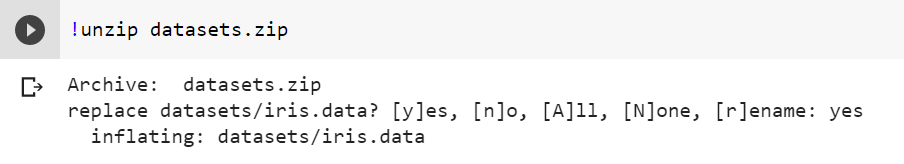

With simple datasets it is an overkill but working with <code>**PyTorch dataloaders**</code> and larger datasets for example large image datasets like MNIST where it has 50 000 images and it is just faster to upload or copy a single file and then unpack it comapared to uploading 50 000 files.

### GPU

Actually we haven yet used the GPU and this ADELINE notebook here yet. If we want use the GPU we have to do one additional step to change the device.

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
model.to(DEVICE)

In this computer there is only one GPU so we use index 0 it stands for first GPU. It applicable when <code>**torch.nn.Module**</code> is used. And the dataset has to be loaded to GPU as well.

In [ ]:
X_train.to(DEVICE)
y_train.to(DEVICE)

But further in th course we will automate this transfer to GPU procedure with flags and specify it only once. And it will automatically update it everywhere where we want to use the correct device.